TASK-2


test data does not have the target column, and won't be able to calculate the accuracy or plot the confusion matrix for the test data. 

even the test dataset have less numbers of rows than train dataset

PRE_PROCESSING

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
training_file_path = 'train.xlsx'
testing_file_path = 'test.xlsx'

In [3]:
training_data = pd.read_excel(training_file_path)
testing_data = pd.read_excel(testing_file_path)

In [4]:

testing_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


In [6]:
training_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,B34
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,B15
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,A6
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,B2


In [5]:
training_data_reduced = training_data.drop(training_data.index[15752:36752])


In [6]:

XX = training_data_reduced.drop('target' , axis=1)
XX


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-70,-78,-65,-65,-38,-54,-66,-66,-77,-64,-64,-65,-55,-60,-55,-64,-66,-70
15748,-51,-58,-50,-54,-68,-57,-65,-71,-66,-56,-52,-53,-62,-64,-65,-60,-84,-71
15749,-62,-72,-63,-70,-62,-66,-54,-48,-49,-67,-63,-65,-70,-59,-68,-44,-45,-54
15750,-62,-73,-67,-68,-81,-72,-73,-78,-82,-56,-68,-62,-73,-77,-64,-71,-72,-82


train_test_split



Train dataset accuracy

In [7]:
X = training_data.drop('target', axis=1)
y = training_data['target']

In [8]:
X_Train, X_val, y_Train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train)
X_val_scaled = scaler.transform(X_val)


RANDOM FOREST

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_Train_scaled,y_Train)

RandomForestClassifier(random_state=42)

In [11]:
predicted_test = rf_classifier.predict(X_val_scaled)

In [12]:
predicted_test_DataSet = rf_classifier.predict(XX)
predicted_test_DataSet

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['A74', 'A74', 'A74', ..., 'A74', 'A74', 'A74'], dtype=object)

In [13]:
testing_data["Random_Forest"] = predicted_test_DataSet

In [14]:
testing_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,Random_Forest
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60,A74
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80,A74
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70,A74
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65,A74
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57,A74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51,A74
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64,A74
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54,A74
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69,A74


In [15]:
test_accuracy = accuracy_score(y_val, predicted_test)
test_accuracy

0.9861243368249217

ACCURACY = 98%

In [16]:
conf_matrix = confusion_matrix(y_val, predicted_test)
conf_matrix

array([[35,  0,  0, ...,  0,  0,  0],
       [ 0, 35,  0, ...,  0,  0,  0],
       [ 0,  0, 41, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 54,  0,  0],
       [ 0,  0,  0, ...,  0, 39,  0],
       [ 0,  0,  0, ...,  0,  0, 36]], dtype=int64)

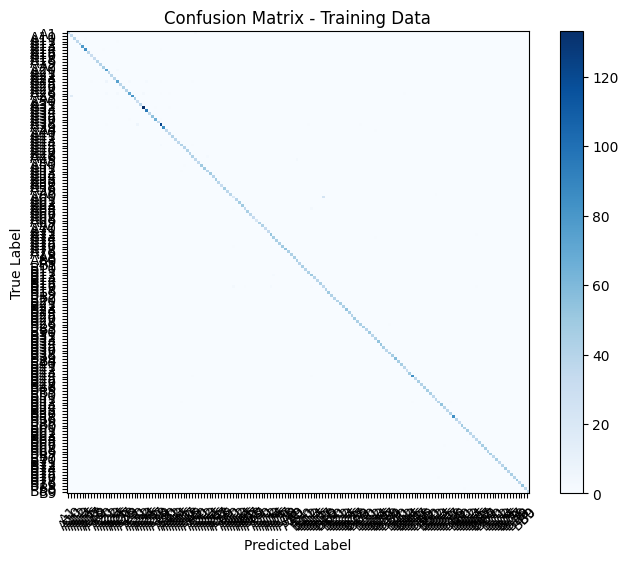

In [80]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Data')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(conf_matrix)), labels=np.unique(y_val), rotation=45)
plt.yticks(np.arange(len(conf_matrix)), labels=np.unique(y_val))
plt.show()

DECISION TREE

In [17]:
from sklearn.tree import DecisionTreeClassifier


In [18]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_Train_scaled, y_Train)

DecisionTreeClassifier(random_state=42)

In [19]:
predicted_test = dt_classifier.predict(X_val_scaled)
predicted_test

array(['B62', 'B55', 'A52', ..., 'A2', 'B2', 'A70'], dtype=object)

In [20]:
predicted_test_dt = dt_classifier.predict(XX)
testing_data['Decision_Tree'] = predicted_test_dt

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [21]:
testing_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,Random_Forest,Decision_Tree
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60,A74,A18
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80,A74,A18
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70,A74,A18
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65,A74,A18
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57,A74,A18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51,A74,A18
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64,A74,A18
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54,A74,A18
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69,A74,A18


In [22]:
test_accuracy = accuracy_score(y_val, predicted_test)
test_accuracy

0.9672153448510407

ACCURACY = 96%

In [23]:
conf_matrix = confusion_matrix(y_val, predicted_test)
conf_matrix

array([[36,  1,  0, ...,  0,  0,  0],
       [ 0, 34,  0, ...,  0,  0,  0],
       [ 0,  0, 41, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 54,  0,  0],
       [ 0,  0,  0, ...,  0, 39,  0],
       [ 0,  0,  0, ...,  0,  0, 35]], dtype=int64)

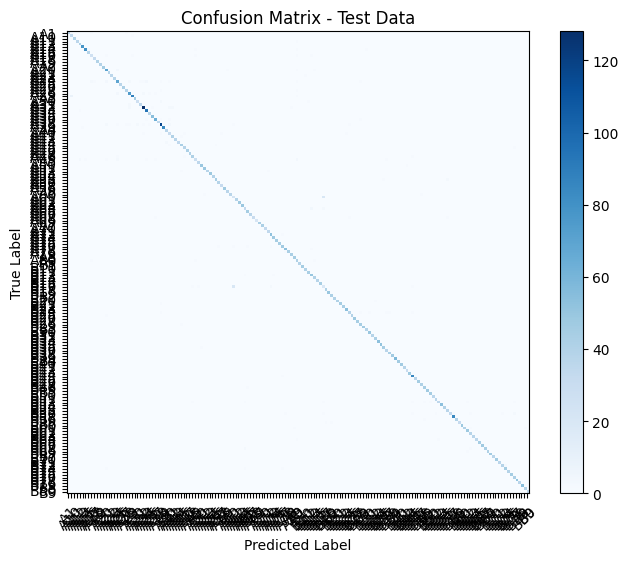

In [24]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(conf_matrix)), labels=np.unique(y_val), rotation=45)
plt.yticks(np.arange(len(conf_matrix)), labels=np.unique(y_val))
plt.show()


K NEAREST NEIGHBOUR

In [25]:
from sklearn.neighbors import KNeighborsClassifier


In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_Train_scaled, y_Train)

KNeighborsClassifier()

In [27]:
predicted_test = knn_classifier.predict(X_val_scaled)
predicted_test

array(['B62', 'B55', 'A52', ..., 'A2', 'B2', 'A70'], dtype=object)

In [28]:
predicted_test_knn = knn_classifier.predict(XX)
predicted_test_knn

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array(['A18', 'A33', 'A34', ..., 'A2', 'A18', 'A18'], dtype=object)

In [29]:
testing_data['K_Nearest_N'] = predicted_test_knn
testing_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T12,T13,T14,T15,T16,T17,T18,Random_Forest,Decision_Tree,K_Nearest_N
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,...,-78,-81,-81,-81,-70,-60,-60,A74,A18,A18
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,...,-58,-66,-79,-72,-83,-74,-80,A74,A18,A33
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,...,-76,-68,-57,-64,-75,-57,-70,A74,A18,A34
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,...,-56,-58,-62,-61,-59,-64,-65,A74,A18,A18
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,...,-67,-63,-63,-55,-49,-49,-57,A74,A18,A33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,...,-62,-68,-60,-58,-54,-48,-51,A74,A18,A33
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,...,-58,-60,-61,-61,-62,-62,-64,A74,A18,A18
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,...,-72,-67,-58,-66,-66,-55,-54,A74,A18,A2
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,...,-66,-55,-60,-55,-64,-66,-69,A74,A18,A18


In [30]:
test_accuracy = accuracy_score(y_val, predicted_test)
test_accuracy

0.9828594749013739

ACCURACYY = 98%

In [31]:
conf_matrix = confusion_matrix(y_val, predicted_test)
conf_matrix

array([[36,  0,  0, ...,  0,  0,  0],
       [ 0, 35,  0, ...,  0,  0,  0],
       [ 0,  0, 41, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 54,  0,  0],
       [ 0,  0,  0, ...,  0, 39,  0],
       [ 0,  0,  0, ...,  0,  0, 36]], dtype=int64)

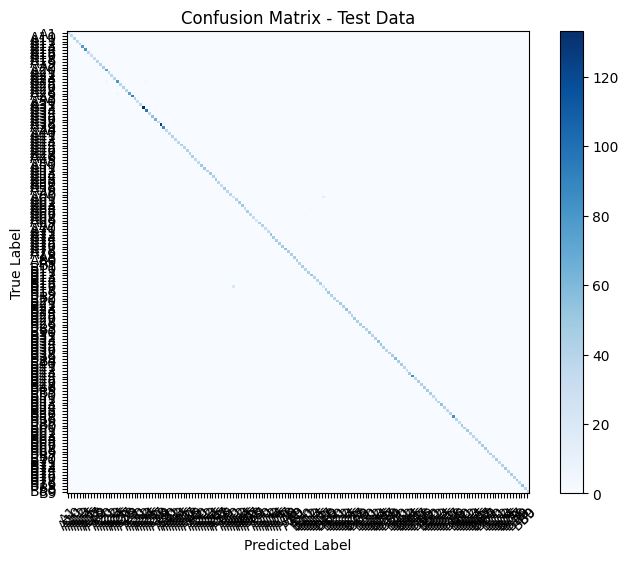

In [32]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(conf_matrix)), labels=np.unique(y_val), rotation=45)
plt.yticks(np.arange(len(conf_matrix)), labels=np.unique(y_val))
plt.show()

SUPPORT VECTOR MACHINE

In [33]:
from sklearn.svm import SVC

In [34]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_Train_scaled, y_Train)

SVC(kernel='linear', random_state=42)

In [35]:
predicted_test = svm_classifier.predict(X_val_scaled)
predicted_test

array(['B62', 'B55', 'A52', ..., 'A2', 'B2', 'A70'], dtype=object)

In [36]:
predicted_test_svm = svm_classifier.predict(XX)
predicted_test_svm


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array(['B23', 'A74', 'B23', ..., 'B23', 'B23', 'B23'], dtype=object)

In [37]:
testing_data['SVM'] = predicted_test_svm

In [ ]:
test_accuracy = accuracy_score(y_val, predicted_test)
test_accuracy


0.9825874030744116

ACCURACY = 98%

In [ ]:
conf_matrix = confusion_matrix(y_val, predicted_test)
conf_matrix

array([[37,  0,  0, ...,  0,  0,  0],
       [ 0, 35,  0, ...,  0,  0,  0],
       [ 0,  0, 40, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 54,  0,  0],
       [ 0,  0,  0, ...,  0, 38,  0],
       [ 0,  0,  0, ...,  0,  0, 36]], dtype=int64)

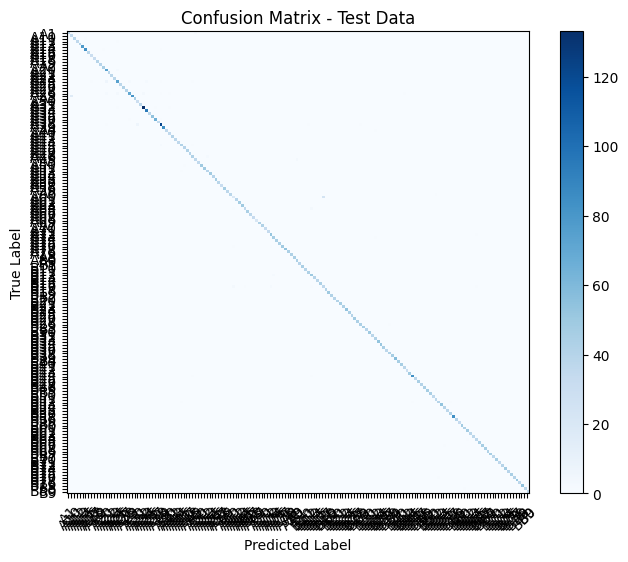

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(conf_matrix)), labels=np.unique(y_val), rotation=45)
plt.yticks(np.arange(len(conf_matrix)), labels=np.unique(y_val))
plt.show()

Decision Tree: Simple to understand and interpret.


KNN: Effective for small datasets and when the decision boundary is non-linear.


SVM: Effective for high-dimensional spaces and when there is a clear margin of separation.